# Final submission for the day will be at bottom

# Importing required Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc,precision_recall_curve,roc_curve
import seaborn as sns

from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
from sklearn import discriminant_analysis

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report
from sklearn.svm import SVC

from sklearn.decomposition import PCA
from imblearn.combine import SMOTEENN

from sklearn.metrics import confusion_matrix
import itertools
from itertools import cycle

from sklearn import discriminant_analysis

Using TensorFlow backend.


# Importing the Dataset

In [2]:
Dataframe = pd.read_csv("C:/Users/Dhanuka/data-storm-10/credit_card_default_train.csv")
test_set=pd.read_csv("C:/Users/Dhanuka/data-storm-10/credit_card_default_test.csv")

In [3]:
Dataframe.columns

Index(['Client_ID', 'Balance_Limit_V1', 'Gender', 'EDUCATION_STATUS',
       'MARITAL_STATUS', 'AGE', 'PAY_JULY', 'PAY_AUG', 'PAY_SEP', 'PAY_OCT',
       'PAY_NOV', 'PAY_DEC', 'DUE_AMT_JULY', 'DUE_AMT_AUG', 'DUE_AMT_SEP',
       'DUE_AMT_OCT', 'DUE_AMT_NOV', 'DUE_AMT_DEC', 'PAID_AMT_JULY',
       'PAID_AMT_AUG', 'PAID_AMT_SEP', 'PAID_AMT_OCT', 'PAID_AMT_NOV',
       'PAID_AMT_DEC', 'NEXT_MONTH_DEFAULT'],
      dtype='object')

# Examining the null values of the Dataset

In [4]:
Dataframe.isnull().sum()

Client_ID             0
Balance_Limit_V1      0
Gender                0
EDUCATION_STATUS      0
MARITAL_STATUS        0
AGE                   0
PAY_JULY              0
PAY_AUG               0
PAY_SEP               0
PAY_OCT               0
PAY_NOV               0
PAY_DEC               0
DUE_AMT_JULY          0
DUE_AMT_AUG           0
DUE_AMT_SEP           0
DUE_AMT_OCT           0
DUE_AMT_NOV           0
DUE_AMT_DEC           0
PAID_AMT_JULY         0
PAID_AMT_AUG          0
PAID_AMT_SEP          0
PAID_AMT_OCT          0
PAID_AMT_NOV          0
PAID_AMT_DEC          0
NEXT_MONTH_DEFAULT    0
dtype: int64

In [6]:
test_set.isnull().sum()

Client_ID           0
Balance_Limit_V1    0
Gender              0
EDUCATION_STATUS    0
MARITAL_STATUS      0
AGE                 0
PAY_JULY            0
PAY_AUG             0
PAY_SEP             0
PAY_OCT             0
PAY_NOV             0
PAY_DEC             0
DUE_AMT_JULY        0
DUE_AMT_AUG         0
DUE_AMT_SEP         0
DUE_AMT_OCT         0
DUE_AMT_NOV         0
DUE_AMT_DEC         0
PAID_AMT_JULY       0
PAID_AMT_AUG        0
PAID_AMT_SEP        0
PAID_AMT_OCT        0
PAID_AMT_NOV        0
PAID_AMT_DEC        0
dtype: int64

# Renaming the Dataset as test and train

In [7]:
id_train = Dataframe.iloc[:,0:1]

In [8]:
X_train = Dataframe.iloc[:,1:24]

In [9]:
id_test = test_set.iloc[:,0:1]

In [10]:
X_test = test_set.iloc[:,1:]

In [11]:
Y_train = Dataframe.iloc[:,24:]

# Finding the biasness of the Dataset

In [12]:
num_of_zeros=Y_train[Y_train['NEXT_MONTH_DEFAULT']==0].shape[0]

In [13]:
num_of_zeros

18670

In [14]:
num_of_ones=Y_train[Y_train['NEXT_MONTH_DEFAULT']==1].shape[0]

In [15]:
num_of_ones

5330

In [16]:
bias_ratio_of_ones=num_of_ones/(num_of_zeros+num_of_ones)

In [17]:
bias_ratio_of_ones

0.22208333333333333

In [18]:
bias_ratio_of_zeros=num_of_zeros/(num_of_zeros+num_of_ones)

In [19]:
bias_ratio_of_zeros

0.7779166666666667

# Concatenating the Test and Train datasets for OneHotEncoding

In [20]:
Total_set=pd.concat([X_train,X_test],axis=0)

In [21]:
dummies_Gender=pd.get_dummies(Total_set['Gender'],prefix='Gender')
dummies_EDUCATION_STATUS= pd.get_dummies(Total_set['EDUCATION_STATUS'], prefix= 'EDUCATION_STATUS') 
dummies_MARITAL_STATUS= pd.get_dummies(Total_set['MARITAL_STATUS'], prefix= 'MARITAL_STATUS')
dummies_AGE= pd.get_dummies(Total_set['AGE'], prefix= 'AGE')

In [22]:
Total_set = pd.concat([Total_set, dummies_Gender, dummies_EDUCATION_STATUS, dummies_MARITAL_STATUS, dummies_AGE,], axis=1)
Total_set = Total_set.drop(['Gender','EDUCATION_STATUS','MARITAL_STATUS','AGE'], axis=1)

In [23]:
Total_set.shape

(30000, 30)

In [24]:
Total_set.columns

Index(['Balance_Limit_V1', 'PAY_JULY', 'PAY_AUG', 'PAY_SEP', 'PAY_OCT',
       'PAY_NOV', 'PAY_DEC', 'DUE_AMT_JULY', 'DUE_AMT_AUG', 'DUE_AMT_SEP',
       'DUE_AMT_OCT', 'DUE_AMT_NOV', 'DUE_AMT_DEC', 'PAID_AMT_JULY',
       'PAID_AMT_AUG', 'PAID_AMT_SEP', 'PAID_AMT_OCT', 'PAID_AMT_NOV',
       'PAID_AMT_DEC', 'Gender_F', 'Gender_M', 'EDUCATION_STATUS_Graduate',
       'EDUCATION_STATUS_High School', 'EDUCATION_STATUS_Other',
       'MARITAL_STATUS_Other', 'MARITAL_STATUS_Single', 'AGE_31-45',
       'AGE_46-65', 'AGE_Less than 30', 'AGE_More than 65'],
      dtype='object')

In [25]:
Total_set

,Balance_Limit_V1,PAY_JULY,PAY_AUG,PAY_SEP,PAY_OCT,PAY_NOV,PAY_DEC,DUE_AMT_JULY,DUE_AMT_AUG,DUE_AMT_SEP,...,Gender_M,EDUCATION_STATUS_Graduate,EDUCATION_STATUS_High School,EDUCATION_STATUS_Other,MARITAL_STATUS_Other,MARITAL_STATUS_Single,AGE_31-45,AGE_46-65,AGE_Less than 30,AGE_More than 65
0,1M,-1,-1,-1,-1,-1,-1,3248,3389,6004,...,1,1,0,0,1,0,1,0,0,0
1,1M,0,-1,-1,-1,-1,0,353351,151818,26948,...,0,0,1,0,1,0,0,0,1,0
2,100K,4,3,2,2,-2,-2,16681,16082,15477,...,0,0,1,0,0,1,1,0,0,0
3,200K,2,0,0,0,0,0,90457,92848,95193,...,0,1,0,0,0,1,1,0,0,0
4,1M,2,2,0,0,0,0,429556,419466,429785,...,0,1,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1M,0,0,0,0,0,0,512728,515604,522982,...,1,0,1,0,1,0,1,0,0,0
5996,1.5M,-1,-1,-1,-2,-1,-1,1610,1155,0,...,0,1,0,0,0,1,1,0,0,0
5997,300K,0,0,0,0,0,0,188646,106422,79508,...,1,0,0,1,0,1,1,0,0,0
5998,200K,-1,2,-1,0,0,0,1677,1677,35574,...,1,0,1,0,0,1,0,1,0,0


# Resplitting the data as Test and Train

In [26]:
x_train=Total_set.iloc[:24000]
x_test=Total_set.iloc[24000:]

In [27]:
Train_columns = list(x_train.columns)

In [28]:
Train_columns

['Balance_Limit_V1',
 'PAY_JULY',
 'PAY_AUG',
 'PAY_SEP',
 'PAY_OCT',
 'PAY_NOV',
 'PAY_DEC',
 'DUE_AMT_JULY',
 'DUE_AMT_AUG',
 'DUE_AMT_SEP',
 'DUE_AMT_OCT',
 'DUE_AMT_NOV',
 'DUE_AMT_DEC',
 'PAID_AMT_JULY',
 'PAID_AMT_AUG',
 'PAID_AMT_SEP',
 'PAID_AMT_OCT',
 'PAID_AMT_NOV',
 'PAID_AMT_DEC',
 'Gender_F',
 'Gender_M',
 'EDUCATION_STATUS_Graduate',
 'EDUCATION_STATUS_High School',
 'EDUCATION_STATUS_Other',
 'MARITAL_STATUS_Other',
 'MARITAL_STATUS_Single',
 'AGE_31-45',
 'AGE_46-65',
 'AGE_Less than 30',
 'AGE_More than 65']

# Changing the variable Balance_Limit to a number

In [29]:
for i in range(24000):
    if x_train['Balance_Limit_V1'][i][-1]=='M':
        x_train.loc[i:i,('Balance_Limit_V1')]=float(x_train['Balance_Limit_V1'][i][:-1])*1000000
    else:
        x_train.loc[i:i,('Balance_Limit_V1')]=float(x_train['Balance_Limit_V1'][i][:-1])*1000

c:\users\dhanuka\anaconda3\envs\mlenv\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [30]:
for i in range(6000):
    if x_test['Balance_Limit_V1'][i][-1]=='M':
        x_test.loc[i:i,('Balance_Limit_V1')]=float(x_test['Balance_Limit_V1'][i][:-1])*1000000
    else:
        x_test.loc[i:i,('Balance_Limit_V1')]=float(x_test['Balance_Limit_V1'][i][:-1])*1000

In [31]:
x_train

,Balance_Limit_V1,PAY_JULY,PAY_AUG,PAY_SEP,PAY_OCT,PAY_NOV,PAY_DEC,DUE_AMT_JULY,DUE_AMT_AUG,DUE_AMT_SEP,...,Gender_M,EDUCATION_STATUS_Graduate,EDUCATION_STATUS_High School,EDUCATION_STATUS_Other,MARITAL_STATUS_Other,MARITAL_STATUS_Single,AGE_31-45,AGE_46-65,AGE_Less than 30,AGE_More than 65
0,1000000,-1,-1,-1,-1,-1,-1,3248,3389,6004,...,1,1,0,0,1,0,1,0,0,0
1,1000000,0,-1,-1,-1,-1,0,353351,151818,26948,...,0,0,1,0,1,0,0,0,1,0
2,100000,4,3,2,2,-2,-2,16681,16082,15477,...,0,0,1,0,0,1,1,0,0,0
3,200000,2,0,0,0,0,0,90457,92848,95193,...,0,1,0,0,0,1,1,0,0,0
4,1000000,2,2,0,0,0,0,429556,419466,429785,...,0,1,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,1000000,0,0,0,0,0,0,436470,445403,481323,...,0,0,1,0,0,1,1,0,0,0
23996,400000,-1,-1,-1,-1,0,0,3888,4223,8090,...,0,0,1,0,1,0,1,0,0,0
23997,100000,4,3,2,-1,0,0,8235,7752,6371,...,0,0,0,1,1,0,1,0,0,0
23998,200000,1,-1,0,0,0,-1,-3800,181055,176262,...,0,0,1,0,0,1,1,0,0,0


In [32]:
x_test

,Balance_Limit_V1,PAY_JULY,PAY_AUG,PAY_SEP,PAY_OCT,PAY_NOV,PAY_DEC,DUE_AMT_JULY,DUE_AMT_AUG,DUE_AMT_SEP,...,Gender_M,EDUCATION_STATUS_Graduate,EDUCATION_STATUS_High School,EDUCATION_STATUS_Other,MARITAL_STATUS_Other,MARITAL_STATUS_Single,AGE_31-45,AGE_46-65,AGE_Less than 30,AGE_More than 65
0,500000,0,0,0,0,0,0,194188,198510,128316,...,1,0,0,1,0,1,1,0,0,0
1,200000,0,0,0,0,0,0,87115,89427,91823,...,0,0,0,1,0,1,1,0,0,0
2,400000,-1,-1,2,0,0,-1,2693,9573,8984,...,1,0,0,1,1,0,0,0,1,0
3,1500000,1,-1,-1,-2,-2,-2,0,5775,5775,...,1,1,0,0,0,1,1,0,0,0
4,100000,0,0,-2,-2,-2,-2,85257,0,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1000000,0,0,0,0,0,0,512728,515604,522982,...,1,0,1,0,1,0,1,0,0,0
5996,1500000,-1,-1,-1,-2,-1,-1,1610,1155,0,...,0,1,0,0,0,1,1,0,0,0
5997,300000,0,0,0,0,0,0,188646,106422,79508,...,1,0,0,1,0,1,1,0,0,0
5998,200000,-1,2,-1,0,0,0,1677,1677,35574,...,1,0,1,0,0,1,0,1,0,0


# Observing Characteristics of Next Month Default Vs other variables

In [33]:
Dataframe_for_graphs=pd.concat([x_train,Y_train],axis=1)

In [34]:
Dataframe_for_graphs

,Balance_Limit_V1,PAY_JULY,PAY_AUG,PAY_SEP,PAY_OCT,PAY_NOV,PAY_DEC,DUE_AMT_JULY,DUE_AMT_AUG,DUE_AMT_SEP,...,EDUCATION_STATUS_Graduate,EDUCATION_STATUS_High School,EDUCATION_STATUS_Other,MARITAL_STATUS_Other,MARITAL_STATUS_Single,AGE_31-45,AGE_46-65,AGE_Less than 30,AGE_More than 65,NEXT_MONTH_DEFAULT
0,1000000,-1,-1,-1,-1,-1,-1,3248,3389,6004,...,1,0,0,1,0,1,0,0,0,0
1,1000000,0,-1,-1,-1,-1,0,353351,151818,26948,...,0,1,0,1,0,0,0,1,0,0
2,100000,4,3,2,2,-2,-2,16681,16082,15477,...,0,1,0,0,1,1,0,0,0,1
3,200000,2,0,0,0,0,0,90457,92848,95193,...,1,0,0,0,1,1,0,0,0,1
4,1000000,2,2,0,0,0,0,429556,419466,429785,...,1,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,1000000,0,0,0,0,0,0,436470,445403,481323,...,0,1,0,0,1,1,0,0,0,0
23996,400000,-1,-1,-1,-1,0,0,3888,4223,8090,...,0,1,0,1,0,1,0,0,0,0
23997,100000,4,3,2,-1,0,0,8235,7752,6371,...,0,0,1,1,0,1,0,0,0,1
23998,200000,1,-1,0,0,0,-1,-3800,181055,176262,...,0,1,0,0,1,1,0,0,0,1


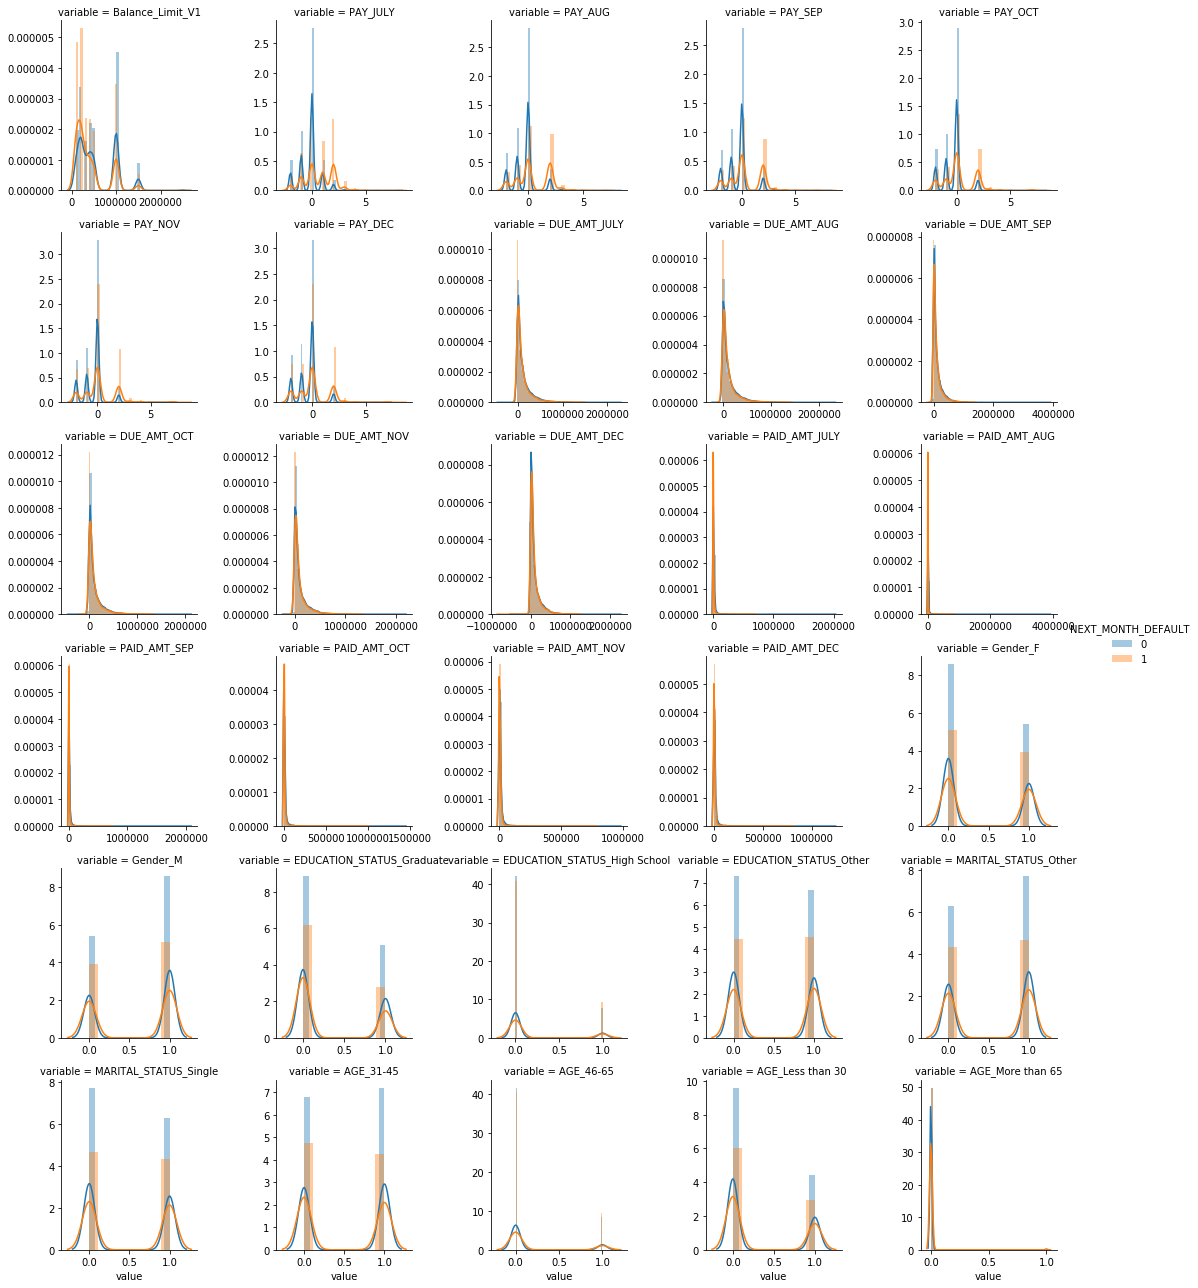

In [37]:
f = pd.melt( Dataframe_for_graphs, id_vars='NEXT_MONTH_DEFAULT', value_vars=Train_columns)
g = sns.FacetGrid( f, hue='NEXT_MONTH_DEFAULT', col="variable", col_wrap=5, sharex=False, sharey=False )
g = g.map( sns.distplot, "value", kde=True).add_legend()

# Correlation between variables

In [38]:
corr=Dataframe_for_graphs.corr()

In [39]:
corr.style.background_gradient(cmap='coolwarm')

,Balance_Limit_V1,PAY_JULY,PAY_AUG,PAY_SEP,PAY_OCT,PAY_NOV,PAY_DEC,DUE_AMT_JULY,DUE_AMT_AUG,DUE_AMT_SEP,DUE_AMT_OCT,DUE_AMT_NOV,DUE_AMT_DEC,PAID_AMT_JULY,PAID_AMT_AUG,PAID_AMT_SEP,PAID_AMT_OCT,PAID_AMT_NOV,PAID_AMT_DEC,Gender_F,Gender_M,EDUCATION_STATUS_Graduate,EDUCATION_STATUS_High School,EDUCATION_STATUS_Other,MARITAL_STATUS_Other,MARITAL_STATUS_Single,AGE_31-45,AGE_46-65,AGE_Less than 30,AGE_More than 65,NEXT_MONTH_DEFAULT
Balance_Limit_V1,1,-0.257252,-0.281462,-0.274788,-0.250769,-0.237439,-0.224307,0.279922,0.272542,0.277842,0.286514,0.286916,0.281861,0.181979,0.165341,0.194308,0.191948,0.207909,0.210399,-0.0222018,0.0222018,0.246245,-0.135102,-0.13554,-0.102112,0.102112,0.200854,0.00515236,-0.22296,0.024552,-0.148938
PAY_JULY,-0.257252,1,0.672879,0.573821,0.536305,0.507525,0.472829,0.185679,0.18849,0.177217,0.178472,0.17896,0.174119,-0.076644,-0.0706821,-0.0719125,-0.0661681,-0.0617827,-0.0573836,0.0543111,-0.0543111,-0.140541,0.0593654,0.0904889,0.0182007,-0.0182007,-0.0742152,0.00166163,0.078371,-0.000459426,0.324362
PAY_AUG,-0.281462,0.672879,1,0.769483,0.663299,0.623183,0.574809,0.231329,0.232236,0.220307,0.220035,0.218245,0.216508,-0.0800196,-0.0586951,-0.0568118,-0.0488665,-0.0399919,-0.0382897,0.0662101,-0.0662101,-0.168204,0.0637543,0.1137,0.0245761,-0.0245761,-0.08527,0.00309029,0.0897294,-0.00548738,0.260531
PAY_SEP,-0.274788,0.573821,0.769483,1,0.777325,0.685249,0.63186,0.206157,0.235612,0.225075,0.22587,0.222367,0.218815,0.00126901,-0.066148,-0.053531,-0.046878,-0.0391318,-0.0373848,0.0616221,-0.0616221,-0.158866,0.0613402,0.106555,0.0313893,-0.0313893,-0.0833708,0.00656802,0.085352,-0.00922185,0.229338
PAY_OCT,-0.250769,0.536305,0.663299,0.777325,1,0.816308,0.712701,0.201448,0.224754,0.243126,0.245476,0.241471,0.237184,-0.00980509,-0.00268822,-0.0673226,-0.042888,-0.0349688,-0.0267435,0.0557791,-0.0557791,-0.150917,0.056686,0.102396,0.0300597,-0.0300597,-0.0789222,0.00618596,0.0806131,-0.00711025,0.212407
PAY_NOV,-0.237439,0.507525,0.623183,0.685249,0.816308,1,0.815471,0.204633,0.225546,0.241057,0.271744,0.267499,0.260156,-0.00615229,-0.00403761,0.0106116,-0.0606855,-0.0349057,-0.0236801,0.0497633,-0.0497633,-0.139776,0.0489785,0.0974451,0.031228,-0.031228,-0.0801558,8.19321e-05,0.0862879,-0.00244685,0.201231
PAY_DEC,-0.224307,0.472829,0.574809,0.63186,0.712701,0.815471,1,0.207887,0.227899,0.240951,0.268478,0.291123,0.2858,-0.00236839,-0.00648111,0.00774891,0.0172868,-0.047212,-0.0263525,0.0404514,-0.0404514,-0.125931,0.0396604,0.0910984,0.0265911,-0.0265911,-0.0703782,-0.00318523,0.0774801,0.00499368,0.187095
DUE_AMT_JULY,0.279922,0.185679,0.231329,0.206157,0.201448,0.204633,0.207887,1,0.950565,0.892059,0.863839,0.831057,0.804521,0.14444,0.096829,0.157601,0.153476,0.170202,0.182608,0.0344339,-0.0344339,-0.0227736,-0.0219916,0.0380597,-0.0270562,0.0270562,0.045404,0.0166036,-0.0657527,0.0272588,-0.0200102
DUE_AMT_AUG,0.272542,0.18849,0.232236,0.235612,0.224754,0.225546,0.227899,0.950565,1,0.927536,0.895408,0.860712,0.832827,0.281,0.097045,0.150237,0.143024,0.159475,0.17656,0.0320495,-0.0320495,-0.0207784,-0.0226696,0.0366531,-0.026237,0.026237,0.0456464,0.0147503,-0.0644448,0.0267696,-0.0151799
DUE_AMT_SEP,0.277842,0.177217,0.220307,0.225075,0.243126,0.241057,0.240951,0.892059,0.927536,1,0.925856,0.882956,0.852853,0.244708,0.321043,0.135036,0.139492,0.184681,0.185856,0.0248567,-0.0248567,-0.0128351,-0.0221983,0.0287065,-0.0292275,0.0292275,0.0479208,0.0141861,-0.0662349,0.0252822,-0.0147218


# Correlation between NEXT_MONTH_DEFAULT and other variables

In [40]:
corr_NEXT_MONTH_DEFAULT=corr['NEXT_MONTH_DEFAULT']

In [41]:
corr_NEXT_MONTH_DEFAULT=abs(corr_NEXT_MONTH_DEFAULT)

In [42]:
corr_NEXT_MONTH_DEFAULT=corr_NEXT_MONTH_DEFAULT.sort_values(ascending=False)

In [43]:
corr_NEXT_MONTH_DEFAULT

NEXT_MONTH_DEFAULT              1.000000
PAY_JULY                        0.324362
PAY_AUG                         0.260531
PAY_SEP                         0.229338
PAY_OCT                         0.212407
PAY_NOV                         0.201231
PAY_DEC                         0.187095
Balance_Limit_V1                0.148938
PAID_AMT_JULY                   0.072891
PAID_AMT_AUG                    0.059039
PAID_AMT_SEP                    0.057808
PAID_AMT_OCT                    0.056143
PAID_AMT_NOV                    0.053849
PAID_AMT_DEC                    0.052466
EDUCATION_STATUS_Graduate       0.048829
Gender_F                        0.041649
Gender_M                        0.041649
AGE_31-45                       0.033592
EDUCATION_STATUS_High School    0.030986
MARITAL_STATUS_Other            0.027905
MARITAL_STATUS_Single           0.027905
AGE_46-65                       0.026336
EDUCATION_STATUS_Other          0.023771
DUE_AMT_JULY                    0.020010
DUE_AMT_AUG     

# Feature ranking with recursive feature elimination and cross-validated selection of the best number of features

c:\users\dhanuka\anaconda3\envs\mlenv\lib\site-packages\sklearn\model_selection\_split.py:629: FutureWarning: The default value of n_split will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(NSPLIT_WARNING, FutureWarning)
c:\users\dhanuka\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Optimal number of features : 22


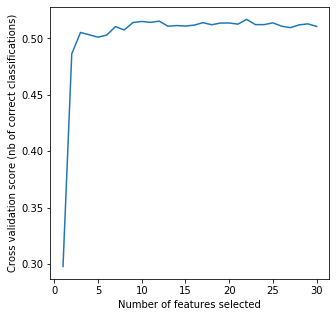

In [44]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100,max_features='auto',random_state=0,max_depth=14,class_weight='balanced')
rfecv = RFECV(estimator=clf, step=1, cv=StratifiedKFold(),scoring='f1')
rfecv.fit(x_train, Y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

plt.figure(figsize=(5,5))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [45]:
rfecv.grid_scores_

array([0.29796047, 0.48624632, 0.50522927, 0.50314469, 0.50104417,
       0.50296294, 0.51040995, 0.50740563, 0.51402435, 0.51495873,
       0.51415098, 0.51524707, 0.51075251, 0.51134299, 0.51089003,
       0.51172681, 0.51388431, 0.51207409, 0.51355961, 0.51361847,
       0.51258317, 0.5168327 , 0.51217871, 0.51217079, 0.51376308,
       0.51075837, 0.5094901 , 0.51193758, 0.51282811, 0.51055525])

In [46]:
rfecv.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True, False, False, False,  True, False,
       False, False, False])

In [47]:
rfecv.ranking_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1,
       8, 3, 5, 1, 2, 6, 7, 9])

In [48]:
x_train.columns.values[rfecv.support_]

array(['Balance_Limit_V1', 'PAY_JULY', 'PAY_AUG', 'PAY_SEP', 'PAY_OCT',
       'PAY_NOV', 'PAY_DEC', 'DUE_AMT_JULY', 'DUE_AMT_AUG', 'DUE_AMT_SEP',
       'DUE_AMT_OCT', 'DUE_AMT_NOV', 'DUE_AMT_DEC', 'PAID_AMT_JULY',
       'PAID_AMT_AUG', 'PAID_AMT_SEP', 'PAID_AMT_OCT', 'PAID_AMT_NOV',
       'PAID_AMT_DEC', 'Gender_M', 'EDUCATION_STATUS_Graduate',
       'MARITAL_STATUS_Single'], dtype=object)

# Scaling Features

# Splitting train set as train and cross_validation

In [49]:
from sklearn.model_selection import train_test_split
x_train_1, x_validation_1, y_train, y_validation = train_test_split(x_train, Y_train, test_size = 0.25,random_state=42)

# Selecting features with rank 1(from recursive feature elimination) only 

In [50]:
x_train_1=x_train_1[x_train.columns.values[rfecv.support_]]
x_validation_1=x_validation_1[x_train.columns.values[rfecv.support_]]

In [51]:
from sklearn.preprocessing import StandardScaler
scX = StandardScaler()
x_train_1 = scX.fit_transform( x_train_1 )
x_validation_1 = scX.transform( x_validation_1 )

# Defining functions to plot confusion matrix

In [52]:
class_names = ["Non-Default", "Default"]


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [53]:
def plotConfusion(model, X, y):
    y_true, y_pred = y, model.predict(X)
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_true, y_pred)
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure(figsize=(5,5))
    plot_confusion_matrix(cnf_matrix, classes=class_names,
                          title='Confusion matrix, without normalization')

    # Plot normalized confusion matrix
    plt.figure(figsize=(5,5))
    plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                          title='Normalized confusion matrix')

    plt.show()

# Training using a QDA model

In [54]:
QDA_model = discriminant_analysis.QuadraticDiscriminantAnalysis()
QDA_model.fit(x_train_1, y_train)

c:\users\dhanuka\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

Confusion matrix, without normalization
[[4357 9656]
 [ 561 3426]]
Normalized confusion matrix
[[0.31 0.69]
 [0.14 0.86]]


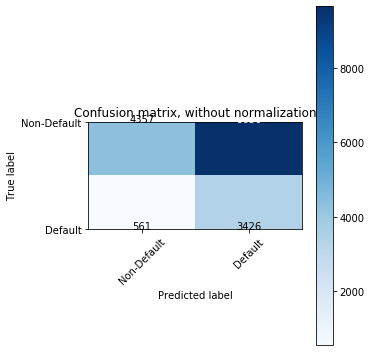

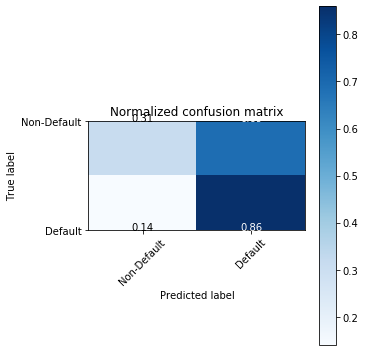

In [55]:
plotConfusion(QDA_model, x_train_1, y_train)

In [56]:
QDA_model.score(x_validation_1, y_validation)

0.4425

# Training and predicting using XGBoost Classifier #1

In [5]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import model_selection, metrics 

In [57]:
from sklearn.metrics import classification_report
gsearch6 = XGBClassifier(learning_rate=0.2, max_depth=8,n_estimators= 150,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27,reg_alpha=0.00035) 
gsearch6.fit(x_train_1,y_train)
pred=gsearch6.predict(x_validation_1)
print(classification_report(y_validation,pred))

c:\users\dhanuka\anaconda3\envs\mlenv\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\dhanuka\anaconda3\envs\mlenv\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.83      0.94      0.89      4657
           1       0.64      0.35      0.46      1343

    accuracy                           0.81      6000
   macro avg       0.74      0.65      0.67      6000
weighted avg       0.79      0.81      0.79      6000



# Training and Predicting using AdaBoost Classifier

In [59]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=9), n_estimators=300,algorithm="SAMME.R", learning_rate=0.0095)
ada_clf.fit(x_train_1,y_train)

c:\users\dhanuka\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=9,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                             

In [60]:
from sklearn import metrics
y_pred = ada_clf.predict(x_validation_1)
print("Accuracy:",metrics.accuracy_score(y_validation, y_pred))
print(classification_report(y_validation,y_pred))

Accuracy: 0.806
              precision    recall  f1-score   support

           0       0.83      0.95      0.88      4657
           1       0.63      0.32      0.42      1343

    accuracy                           0.81      6000
   macro avg       0.73      0.63      0.65      6000
weighted avg       0.78      0.81      0.78      6000



# Performing GridSearch for AdaBoost Classifier

In [ ]:
params = {'n_estimators': [80,100,120,150,180],'learning_rate':[1e-3,5e-3,1e-4]}
#Building a 3 fold CV GridSearchCV object
ada_boost=AdaBoostClassifier(DecisionTreeClassifier(max_depth=9),algorithm="SAMME.R", learning_rate=0.193)
grid_object = GridSearchCV(estimator = ada_boost, param_grid = params, scoring = 'f1', cv = 3, n_jobs = -1)#Fitting the grid to the training data
grid_object.fit(x_train_1, y_train)#Extracting the best parameters
grid_object.best_params_

In [66]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=9), n_estimators=150,algorithm="SAMME.R", learning_rate=0.0001)
ada_clf.fit(x_train_1, y_train)

c:\users\dhanuka\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=9,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                             

In [67]:
from sklearn import metrics
y_pred = ada_clf.predict(x_validation_1)
print("Accuracy:",metrics.accuracy_score(y_validation, y_pred))
print(classification_report(y_validation,y_pred))

Accuracy: 0.8115
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4657
           1       0.64      0.37      0.47      1343

    accuracy                           0.81      6000
   macro avg       0.74      0.65      0.68      6000
weighted avg       0.79      0.81      0.79      6000



# GridSearch 2 for adaBoost Classifier

In [70]:
params = {'n_estimators': [120,150,180],'learning_rate':[1e-3,1e-4,5e-4]}
#Building a 3 fold CV GridSearchCV object
ada_boost=AdaBoostClassifier(DecisionTreeClassifier(max_depth=9),algorithm="SAMME.R", learning_rate=0.193)
grid_object = GridSearchCV(estimator = ada_boost, param_grid = params, scoring = 'f1', cv = 3, n_jobs = -1)#Fitting the grid to the training data
grid_object.fit(x_train_1, y_train)#Extracting the best parameters
grid_object.best_params_

c:\users\dhanuka\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'learning_rate': 0.0001, 'n_estimators': 120}

In [71]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=9), n_estimators=120,algorithm="SAMME.R", learning_rate=0.0001)
ada_clf.fit(x_train_1, y_train)

c:\users\dhanuka\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=9,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                             

In [72]:
from sklearn import metrics
y_pred = ada_clf.predict(x_validation_1)
print("Accuracy:",metrics.accuracy_score(y_validation, y_pred))
print(classification_report(y_validation,y_pred))

Accuracy: 0.8131666666666667
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4657
           1       0.64      0.38      0.47      1343

    accuracy                           0.81      6000
   macro avg       0.74      0.66      0.68      6000
weighted avg       0.79      0.81      0.79      6000



# Training and Predicting using a XGBoost Classifier #2

In [68]:
from sklearn.metrics import classification_report
gsearch2 = XGBClassifier(learning_rate=0.2, max_depth=8,n_estimators= 200,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27,reg_alpha=0.00035) 
gsearch2.fit(x_train_1,y_train)
pred=gsearch2.predict(x_validation_1)
print(classification_report(y_validation,pred))

c:\users\dhanuka\anaconda3\envs\mlenv\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\dhanuka\anaconda3\envs\mlenv\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.83      0.94      0.88      4657
           1       0.63      0.34      0.44      1343

    accuracy                           0.81      6000
   macro avg       0.73      0.64      0.66      6000
weighted avg       0.79      0.81      0.79      6000



# Predicting using Gradient Boost Classifier

In [73]:
from sklearn.ensemble import GradientBoostingClassifier
GradBoost = GradientBoostingClassifier(learning_rate=0.1,max_depth=10,max_features=8,n_estimators=300)
GradBoost.fit(x_train_1,y_train)

c:\users\dhanuka\anaconda3\envs\mlenv\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=10,
                           max_features=8, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=300,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [75]:
y_pred = GradBoost.predict(x_validation_1)
print(classification_report(y_validation,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4657
           1       0.66      0.36      0.46      1343

    accuracy                           0.81      6000
   macro avg       0.75      0.65      0.68      6000
weighted avg       0.80      0.81      0.79      6000



# Predicting using Random Forest #1

In [77]:
ran_for=RandomForestClassifier(n_estimators=100,max_features='auto',class_weight='balanced',random_state=3817,
                          max_depth=14)
ran_for.fit(x_train_1,y_train)

y_pred=ran_for.predict(x_validation_1)
print(classification_report(y_validation,y_pred))

c:\users\dhanuka\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


              precision    recall  f1-score   support

           0       0.86      0.90      0.88      4657
           1       0.57      0.47      0.52      1343

    accuracy                           0.80      6000
   macro avg       0.71      0.69      0.70      6000
weighted avg       0.79      0.80      0.80      6000



# #2

In [79]:
ran_for=RandomForestClassifier(n_estimators=350,max_features=13,class_weight='balanced',min_samples_split=0.1,random_state=3817,
                          max_depth=17)
ran_for.fit(x_train_1,y_train)

y_pred=ran_for.predict(x_validation_1)
print(classification_report(y_validation,y_pred))

c:\users\dhanuka\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


              precision    recall  f1-score   support

           0       0.89      0.80      0.84      4657
           1       0.48      0.64      0.55      1343

    accuracy                           0.76      6000
   macro avg       0.68      0.72      0.69      6000
weighted avg       0.79      0.76      0.78      6000



# Preparing Given Test Dataset

In [83]:
x_test_1=x_test[x_train.columns.values[rfecv.support_]]

In [85]:
x_test_1 = scX.transform( x_test_1 )

# Attempt 1 - Using AdaBoost Classifier

In [86]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=9), n_estimators=120,algorithm="SAMME.R", learning_rate=0.0001)
ada_clf.fit(x_train_1, y_train)

c:\users\dhanuka\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=9,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                             

In [87]:
from sklearn import metrics
y_pred = ada_clf.predict(x_validation_1)
print("Accuracy:",metrics.accuracy_score(y_validation, y_pred))
print(classification_report(y_validation,y_pred))

Accuracy: 0.8123333333333334
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4657
           1       0.64      0.38      0.47      1343

    accuracy                           0.81      6000
   macro avg       0.74      0.66      0.68      6000
weighted avg       0.79      0.81      0.79      6000



In [88]:
y_test_pred=ada_clf.predict(x_test_1)

# Preparing Submission File #1

In [91]:
id_test=id_test['Client_ID']

In [92]:
Test_dataframe=pd.DataFrame({'Client_ID':id_test,'NEXT_MONTH_DEFAULT':y_test_pred})

In [93]:
Test_dataframe.to_csv('submission_1.csv',index=False)

# Attempt 2 - Using XGBoost Classifier

In [101]:
from sklearn.metrics import classification_report
gsearch3 = XGBClassifier() 
gsearch3.fit(x_train_1,y_train)
pred=gsearch3.predict(x_validation_1)
print(classification_report(y_validation,pred))

c:\users\dhanuka\anaconda3\envs\mlenv\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\dhanuka\anaconda3\envs\mlenv\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.84      0.96      0.89      4657
           1       0.71      0.36      0.48      1343

    accuracy                           0.82      6000
   macro avg       0.77      0.66      0.68      6000
weighted avg       0.81      0.82      0.80      6000



In [102]:
y_test_pred=gsearch3.predict(x_test_1)

# Preparing Submission File #2

In [103]:
Test_dataframe=pd.DataFrame({'Client_ID':id_test,'NEXT_MONTH_DEFAULT':y_test_pred})

In [105]:
Test_dataframe.to_csv('submission_2.csv',index=False)